In [3]:
from space_exploration.beans.training_bean import Training
from space_exploration.training.training import ModelTraining

# run_id = "08bb2cf571834f70bb79c41a2333892a"

trainings = {
    "005": ModelTraining.from_training_bean(Training.get_training_or_fail("733435856c964814873ab7fbc1db1003")),
    "005-finetuned": ModelTraining.from_training_bean(Training.get_training_or_fail("3c11337317094328955fb65ff7a56c87")),
    "05": ModelTraining.from_training_bean(Training.get_training_or_fail("a67107ff6b9c4ab6ad48546e70384b88")),
} 






In [29]:
dataset_name = "re200-sr1etot"

dataset = Dataset.get_dataset_or_fail(dataset_name)

paper_ds = dataset.get_training_dataset(64, TransformationReferences.COMPONENT_NORMALIZE.transformation, TransformationReferences.Y_ALONG_COMPONENT_NORMALIZE.transformation, size=300)
test_ds = prepare_dataset(paper_ds, batch_size=1)

import numpy as np
target = np.concatenate([y.cpu().numpy() for (x, y) in iter(test_ds)], axis=0)

⌛ Initializing Dataset...
X...
[########################################] | 100% Completed | 215.28 ms
[########################################] | 100% Completed | 211.83 ms
[########################################] | 100% Completed | 213.11 ms
Y...
[########################################] | 100% Completed | 2.74 ss


In [30]:

def get_mse(target, prediction):
    return ((target - prediction) ** 2).mean(axis=(0, 2, 4))

def get_predictions_mse(model):
    prediction = get_prediction_ds(model, test_ds)
    return get_mse(target, prediction)

In [8]:
trainings["005"].model.custom_load("733435856c964814873ab7fbc1db1003", "final_model/checkpoint_latest.pt")

⌛ Fetching remote artifact at final_model/checkpoint_latest.pt


In [9]:
mse005 = get_predictions_mse(trainings["005"].model)

Testing: 100%|████████████████████████████████████████████████████████████████████████| 300/300 [00:21<00:00, 14.08it/s]


In [24]:
trainings["005-finetuned"].model.custom_load("3c11337317094328955fb65ff7a56c87", "final_model/checkpoint_best.pt")

⌛ Fetching remote artifact at final_model/checkpoint_best.pt


In [27]:
mse_finetuned = get_predictions_mse(trainings["005-finetuned"].model)

Testing: 100%|████████████████████████████████████████████████████████████████████████| 300/300 [00:21<00:00, 13.86it/s]


In [31]:
trainings["05"].model.custom_load("a67107ff6b9c4ab6ad48546e70384b88", "final_model/checkpoint_best.pt")

⌛ Fetching remote artifact at final_model/checkpoint_best.pt


In [32]:
mse_05 = get_predictions_mse(trainings["05"].model)

Testing: 100%|████████████████████████████████████████████████████████████████████████| 300/300 [00:20<00:00, 14.33it/s]


In [37]:
run_id = "ff0a962cc75f40398397ddb07bc82fe3"
x =  ModelTraining.from_training_bean(Training.get_training_or_fail(run_id))
x.model.custom_load(run_id, "final_model/checkpoint_best.pt")
msex = get_predictions_mse(trainings["005"].model)

⌛ Fetching remote artifact at final_model/checkpoint_best.pt


Testing: 100%|████████████████████████████████████████████████████████████████████████| 300/300 [00:20<00:00, 14.29it/s]


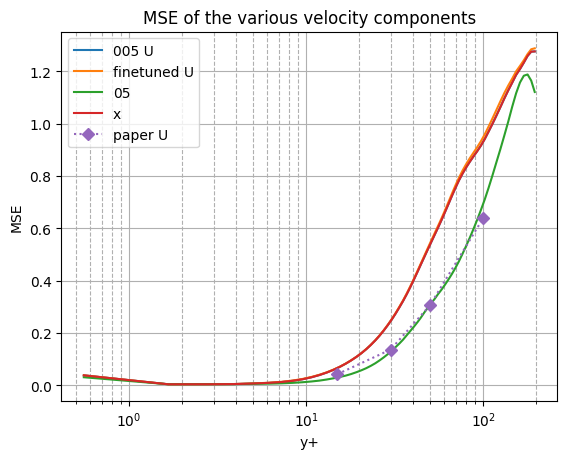

In [39]:
import matplotlib.pyplot as plt
y_dim = dataset.channel.get_simulation_channel().y_dimension[:64] * 200

plt.semilogx(y_dim, mse005[0], label='005 U')
plt.semilogx(y_dim, mse_finetuned[0], label='finetuned U')
plt.semilogx(y_dim, mse_05[0], label='05')

plt.semilogx(y_dim, msex[0], label='x')
plt.semilogx([15, 30, 50, 100], [0.043, 0.137, 0.306, 0.639], label='paper U', linestyle=':', marker='D')
plt.title("MSE of the various velocity components")
plt.xlabel("y+")
plt.ylabel("MSE")
plt.grid()
plt.grid(which='minor', linestyle='--')
plt.legend()